In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os#Walking through directores

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization ((X - X_mean)/X_std)

pd.set_option('display.max_columns', None)#Setting Max Columns Display to Max inorder to get glance of all features in dataframe




from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train (7).csv


In [2]:
import io

missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] #Sometimes Missing Values are't in form of NaN
df = pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']),sep=';') 
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 70000 datapoints in the dataset with 13 Features listed as ['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio']:


In [3]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [4]:
duplicates = len(df) - len(df.drop(['id'],axis=1).drop_duplicates())
df.drop(['id'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
print(f'{duplicates} duplicate records dropped.')

24 duplicate records dropped.


In [5]:
df.describe()

age        gender        height        weight         ap_hi  \
count  69976.000000  69976.000000  69976.000000  69976.000000  69976.000000   
mean   19468.950126      1.349648    164.359152     74.208519    128.820453   
std     2467.374620      0.476862      8.211218     14.397211    154.037729   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  69976.000000  69976.000000  69976.000000  69976.000000  69976.000000   
mean      96.636261      1.366997      1.226535      0.088159      0.053790   
std      188.504581      0.680333      0.572353      0.283528      0.225604   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  69976.000000  69976.000000  
mean       0.803718      0.499771  
std        0.397187      0.500004  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

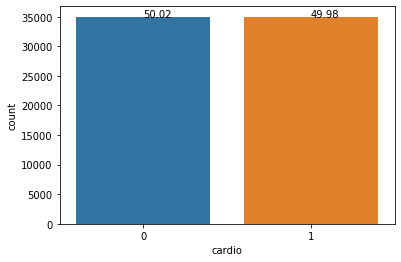

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1)
sns.countplot(df['cardio'], ax = ax)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}'.format((i.get_height()/len(df['cardio']))*100,'%'))
plt.show()

In [7]:
# Age is given in days. Transforming it into years for better understanding and checking relation with the target variable.
df['age'] = df['age']/365

No handles with labels found to put in legend.


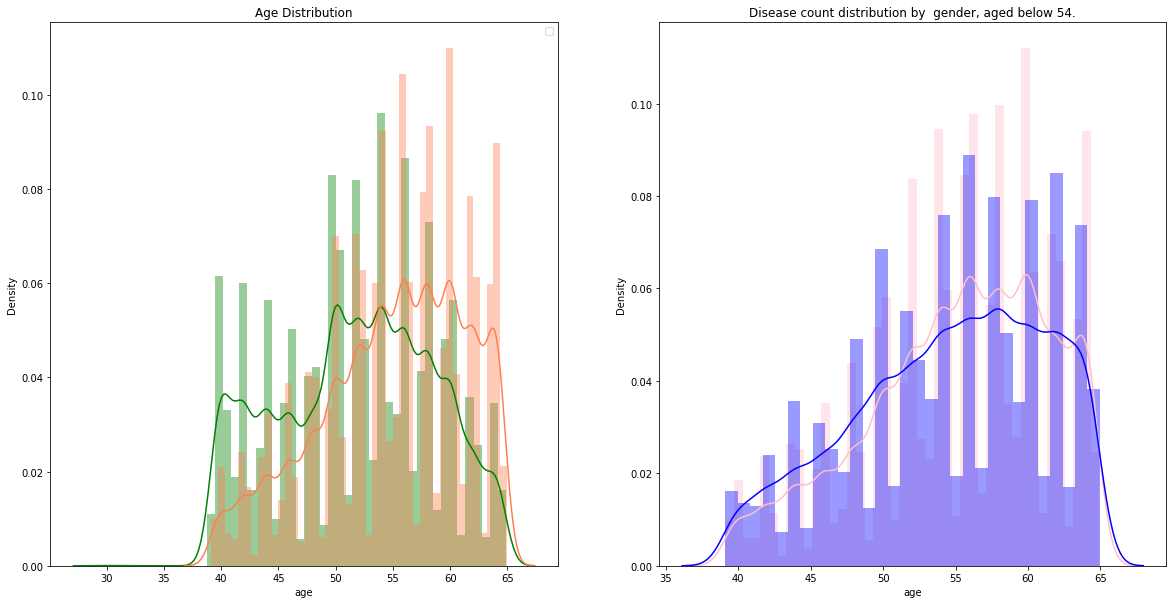

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(df['age'][df['cardio']==0], ax = ax1, color='green')
sns.distplot(df['age'][df['cardio']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend()

sns.distplot(df['age'][(df['gender']==1) & (df['cardio']==1)],ax = ax2,color='pink')
sns.distplot(df['age'][(df['gender']==2) & (df['cardio']==1)],ax = ax2,color='blue')
ax2.set_title('Disease count distribution by  gender, aged below 54.')
plt.show()

In [9]:
df

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      50.391781       2     168    62.0    110     80            1     1   
1      55.419178       1     156    85.0    140     90            3     1   
2      51.663014       1     165    64.0    130     70            3     1   
3      48.282192       2     169    82.0    150    100            1     1   
4      47.873973       1     156    56.0    100     60            1     1   
...          ...     ...     ...     ...    ...    ...          ...   ...   
69995  52.712329       2     168    76.0    120     80            1     1   
69996  61.920548       1     158   126.0    140     90            2     2   
69997  52.235616       2     183   105.0    180     90            3     1   
69998  61.454795       1     163    72.0    135     80            1     2   
69999  56.273973       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69976 rows x 12 columns]

In [10]:
print(f"Missing values are present: {df.isnull().sum().any()}")

Missing values are present: False


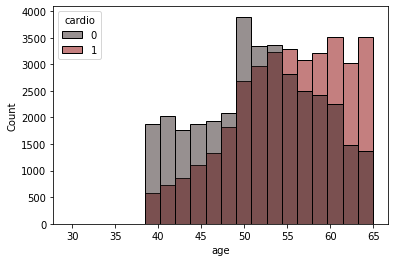

In [11]:
sns.histplot(data=df,x='age',bins=20,hue='cardio',palette="dark:darkred", alpha=0.5)

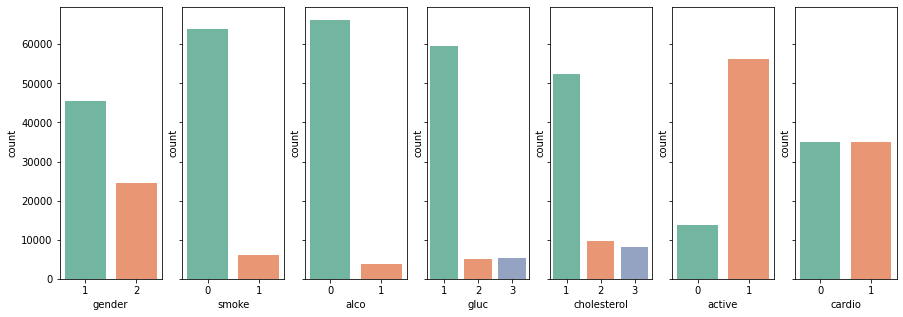

In [12]:
f, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gender',data=df,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=df,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=df,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=df,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=df,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=df,ax=axes[5],palette="Set2")
sns.countplot(x='cardio',data=df,ax=axes[6],palette="Set2")

In [13]:
features_with_null = [features for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


In [14]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


In [15]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 69976 datapoints remaining with 12 features


In [16]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Height Distribution", "Weight Distribution"))

trace0 = go.Histogram(x=df['height'], name = 'Height')
trace1 = go.Histogram(x=df['weight'], name = 'Weight')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Weight", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_layout(title_text="Histograph", height=700)


fig.show()

In [17]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819


In [18]:
outline_free_df = df.copy()
outline_free_df[['height', 'weight']] = np.log(outline_free_df[['height', 'weight']])
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174


In [19]:
outline_free_df = outline_free_df[(outline_free_df['weight'] > outline_free_df['weight'].quantile(0.005)) & (outline_free_df['weight'] < outline_free_df['weight'].quantile(0.995))]
outline_free_df = outline_free_df[(outline_free_df['height'] > outline_free_df['height'].quantile(0.005)) & (outline_free_df['height'] < outline_free_df['height'].quantile(0.995))]
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349


In [20]:
print('Handling outliners cost us {} datapoints'.format(len(df)-len(outline_free_df)))

Handling outliners cost us 1630 datapoints


In [21]:
outline_free_df = outline_free_df[outline_free_df['ap_lo']>=0]
outline_free_df = outline_free_df[outline_free_df['ap_hi']>=0]

In [22]:
print('There are total {} observations where ap_hi < ap_lo'.format(len(outline_free_df[outline_free_df['ap_hi'] < outline_free_df['ap_lo']])))

There are total 1182 observations where ap_hi < ap_lo


In [23]:
cleaned_data = outline_free_df[outline_free_df['ap_hi'] >= outline_free_df['ap_lo']].reset_index(drop=True)
print('Total observations preserved : {}'.format(len(cleaned_data)))

Total observations preserved : 67156


In [24]:
print('As per our assumptions we have total {} outliers'.format(len(cleaned_data[(cleaned_data["ap_hi"]>250) | (cleaned_data["ap_lo"]>200)])))

As per our assumptions we have total 38 outliers


In [25]:
cleaned_data = cleaned_data[(cleaned_data["ap_hi"]<=250) & (cleaned_data["ap_lo"]<=200)]

In [26]:
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], cleaned_data.shape[1]))

Total 67118 datapoints remaining with 12 features


In [27]:
cleaned_data.head()

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  \
0  50.391781       2  5.123964  4.127134    110     80            1     1   
1  55.419178       1  5.049856  4.442651    140     90            3     1   
2  51.663014       1  5.105945  4.158883    130     70            3     1   
3  48.282192       2  5.129899  4.406719    150    100            1     1   
4  47.873973       1  5.049856  4.025352    100     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0

In [28]:
cleaned_data['age'] = cleaned_data['age'].apply(lambda x: int(x))

In [29]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=cleaned_data['age'], name = 'Age'))
fig.show()

In [30]:
duplicate_sum = cleaned_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 3180


In [31]:
duplicated = cleaned_data[cleaned_data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  \
22272   57       2  5.192957  4.605170    120     80            1     1   
58984   57       2  5.192957  4.605170    120     80            1     1   
9953    40       2  5.192957  4.382027    120     80            1     1   
20350   56       2  5.192957  4.382027    150     90            1     1   
28371   56       2  5.192957  4.382027    150     90            1     1   

       smoke  alco  active  cardio  
22272      0     0       1       0  
58984      0     0       1       0  
9953       0     0       1       0  
20350      0     0       1       1  
28371      0     0       1       1

In [32]:
cleaned_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], df.shape[1]))

Total 63938 datapoints remaining with 12 features


In [33]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Age groups grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Age',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [34]:
target_value = cleaned_data['cardio']
cleaned_data_for_pca = cleaned_data.drop(['cardio'], axis=1)

In [35]:
scaled_data = StandardScaler().fit_transform(cleaned_data_for_pca)

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(scaled_data)

pca_data = np.vstack((pca_data.T, target_value)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('first', 'second', 'label'))

In [36]:
fig = go.Figure(data=go.Scattergl(
    x = pca_df['first'], 
    y = pca_df['second'],
    mode='markers',
    marker_color=pca_df['label']
))

fig.show()

In [37]:
def BMI(data):
    return np.exp(data['weight']) / (np.exp(data['height'])/100)**2 
 
cleaned_data['bmi'] = cleaned_data.apply(BMI, axis=1)

In [38]:
def pulse(data):
    return np.subtract(data['ap_hi'], data['ap_lo'])
 
cleaned_data['pulse'] = cleaned_data.apply(pulse, axis=1)

In [39]:
cleaned_data

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  \
0       50       2  5.123964  4.127134    110     80            1     1   
1       55       1  5.049856  4.442651    140     90            3     1   
2       51       1  5.105945  4.158883    130     70            3     1   
3       48       2  5.129899  4.406719    150    100            1     1   
4       47       1  5.049856  4.025352    100     60            1     1   
...    ...     ...       ...       ...    ...    ...          ...   ...   
67150   53       1  5.147494  4.248495    130     90            1     1   
67151   57       1  5.105945  4.382027    150     80            1     1   
67153   52       2  5.209486  4.653960    180     90            3     1   
67154   61       1  5.093750  4.276666    135     80            1     2   
67155   56       1  5.135798  4.276666    120     80            2     1   

       smoke  alco  active  cardio        bmi  pulse  
0          0     0       1       0  21.967120   30.0  
1          0     0       1       1  34.927679   50.0  
2          0     0       0       1  23.507805   60.0  
3          0     0       1       1  28.710479   50.0  
4          0     0       0       0  23.011177   40.0  
...      ...   ...     ...     ...        ...    ...  
67150      0     0       1       1  23.661439   40.0  
67151      0     0       1       1  29.384757   70.0  
67153      0     1       0       1  31.353579   90.0  
67154      0     0       0       1  27.099251   55.0  
67155      0     0       1       0  24.913495   40.0  

[63938 rows x 14 columns]

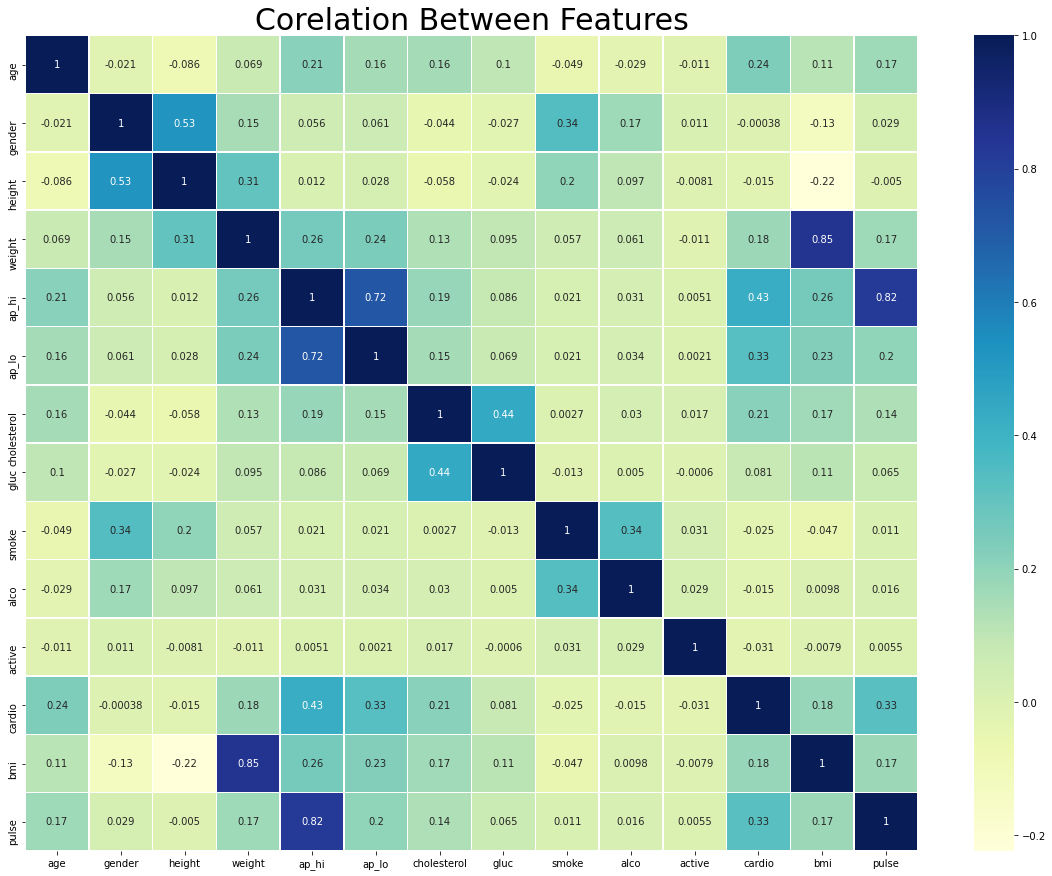

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(cleaned_data.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

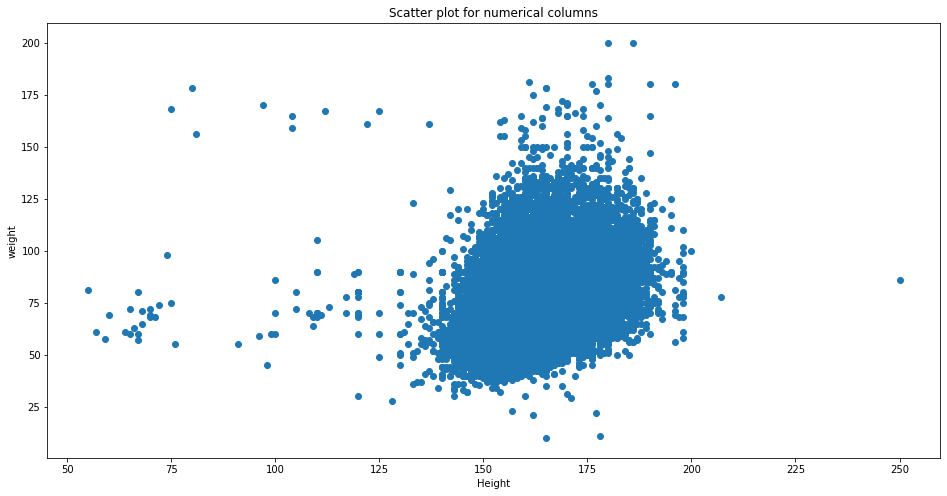

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['height'], df['weight'])
ax.set_title('Scatter plot for numerical columns')
ax.set_xlabel('Height')
ax.set_ylabel('weight')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d92c89310>,
      dtype=object)

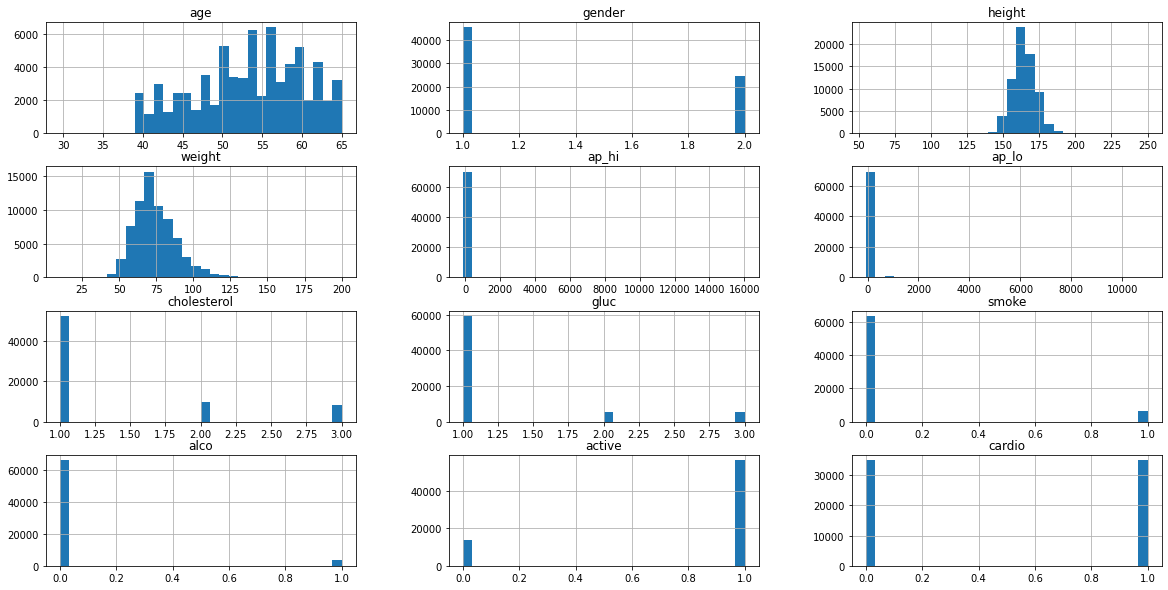

In [42]:
df.hist(figsize=(20,10), bins=30)

In [43]:
from tqdm import tqdm
!pip install sweetviz
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(df)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
